**CNN**

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.where we will use a Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. we choosed to build it with keras API which is very powerfull

 Firstly, we will concentrate on the data then we will focus on the CNN modeling and evaluation.we have 3 main task they are data prepation and cnn modeling and The results prediction and submission

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow.keras as keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
np.random.seed(2)

In [ ]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [ ]:
#now as label is the target we will saparate for training 
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
X_train.shape

missing data handling is one another big task so lets see if any missing values 

In [ ]:
X_train.isnull().sum()
Y_train.isnull().sum()

so there is no missing values in the data we have so next is to we will see there count and normalize them

In [ ]:
sns.countplot(Y_train)

again we have similar counts for the 10 digits so now lets start playing with our data 

Before modifying our data lets see how CNN works..!

CNN image classifications takes an input image, process it and classify it under certain categories (Eg., Dog, Cat, Tiger, Lion). Computers sees an input image as array of pixels and it depends on the image resolution. Based on the image resolution, it will see h x w x d( h = Height, w = Width, d = Dimension ). Eg., An image of 6 x 6 x 3 array of matrix of RGB (3 refers to RGB values) and an image of 4 x 4 x 1 array of matrix of grayscale image.

Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

so now lets normalization our data . We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

 so now we Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1). now lets see how it looks

In [ ]:
plt.figure( figsize = (10,10))
for i in range(1,10):
    plt.subplot(3,4,i)
    plt.imshow(X_train[i+1].reshape([28,28]),cmap="gray")


Wow ... it look good ok now lets  Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)

ok now lets Split training and valdiation set 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

we now split the train set in two parts a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

**Build CNN **

now we try to build Sequential Convolutional Neural Network 

the first convolutional (Conv2D) layer ,this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.genneraly It is like a set of learnable filters . CNN cab able to do feature maps i.e The CNN can isolate features that are useful everywhere from these transformed images.
here in side CNN there are some works going on like Convolution,Strided Convolution,padding,pooling 
convolution It is a process where we take a small matrix of numbers (called kernel or filter), we pass it over our image and transform it based on the values from filter.and calculate by following formula 

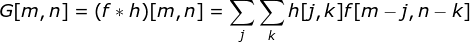

The second important layer in CNN is the pooling (MaxPool2D) layer. Max pooling is a sample-based discretization process. The objective is to down-sample an input representation by reducing its dimensionality

Dropout is a regularization method,i.e to reduce overfitting and improve generalization error in deep neural networks of all kinds.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. It combines all the found local features of the previous convolutional layers.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(128, (3,3), input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'), 
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

once our layers are added to the model, we need to set up  
a loss function and an optimisation algorithm.

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons in order to minimise the loss.

here we will use adam . The adam update adjusts the Adagrad method in a very simple way 

In [ ]:
model.compile(optimizer = 'adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
X_train ,X_test_test,Y_train,Y_test= train_test_split(X_train,Y_train,test_size=0.2)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=5,baseline=0.99)

model.fit(X_train,Y_train, epochs=20, callbacks=[es], validation_data = (X_test_test,Y_test))

its time to evaluate our model

In [ ]:
model.evaluate(X_test_test,Y_test)

we are with 98% accuracy goood . but it is always better to avoid overfitting problem. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.this we generally call as Data augmentation . lets do ...

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

now lets do the fitting process again i 
think we should end up with good accracy this time 

In [ ]:
checkpoint = ModelCheckpoint('best_weigths.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto', period=1)

history = model.fit_generator(datagen.flow(X_train,Y_train),
                              epochs = 30, validation_data = (X_test_test,Y_test),
                              verbose = 1, callbacks=[es,checkpoint])

In [ ]:
X_test_np = np.array(test)

print(X_test_np.shape)

plt.figure( figsize = (10,10))
for i in range(1,20):
    toBePredicted = X_test_np[i].reshape(-1,28,28,1)
    result2 = model.predict(toBePredicted)
    print(np.argmax(result2,axis = 1))
    
    plt.subplot(10,4,i)
    plt.imshow(X_test_np[i].reshape([28,28]))

after Data Augmentation its making good prediction ....now our model is well trained  lets see how accracy vary with no.of epochs

In [ ]:
# predict results
results = model.predict(X_test_np)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
print(results)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [ ]:
acc = history.history['acc']
epochs_s = range(0,30)

plt.plot(epochs_s, acc , label='accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('accuracy vs epochs')
plt.legend()

**you just liked it place upvotes that would be very much appreciated - That will keep me motivated ..**